In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Set seed for reproducibility
np.random.seed(42)

# Read Excel file
data_2 = pd.read_excel("D:\\kulea_projects\\r_project\\east_south_sugar\\Wholesale Sugar Prices.xlsx", sheet_name="Sheet1")

# Select only the "Date" and "nairobi" columns
nairobi_data = data_2[["date", "nairobi"]]

print(nairobi_data.head())

# Create time series
exports_ts_data = pd.Series(nairobi_data["nairobi"].values)

# Fit ARIMA model
arima_model = ARIMA(exports_ts_data, order=(0, 1, 1), seasonal_order=(3, 1, 0, 86)).fit()

# Specify the start date
start_date = pd.to_datetime("2024-02-12")

# Generate forecasted dates
forecast_dates_monday = pd.date_range(start=start_date, periods=arima_model.forecast(steps=52).shape[0], freq="W-MON")
forecast_dates_tuesday = pd.date_range(start=start_date + pd.DateOffset(days=1), periods=arima_model.forecast(steps=52).shape[0], freq="W-TUE")
forecast_dates_friday = pd.date_range(start=start_date - pd.DateOffset(days=3), periods=arima_model.forecast(steps=52).shape[0], freq="W-FRI")


        date  nairobi
0 2019-08-22    805.0
1 2019-08-26    805.0
2 2019-08-29    805.0
3 2019-09-02    786.0
4 2019-09-05    790.0


In [26]:
forecast_dates_monday

DatetimeIndex(['2024-02-12', '2024-02-19', '2024-02-26', '2024-03-04',
               '2024-03-11', '2024-03-18', '2024-03-25', '2024-04-01',
               '2024-04-08', '2024-04-15', '2024-04-22', '2024-04-29',
               '2024-05-06', '2024-05-13', '2024-05-20', '2024-05-27',
               '2024-06-03', '2024-06-10', '2024-06-17', '2024-06-24',
               '2024-07-01', '2024-07-08', '2024-07-15', '2024-07-22',
               '2024-07-29', '2024-08-05', '2024-08-12', '2024-08-19',
               '2024-08-26', '2024-09-02', '2024-09-09', '2024-09-16',
               '2024-09-23', '2024-09-30', '2024-10-07', '2024-10-14',
               '2024-10-21', '2024-10-28', '2024-11-04', '2024-11-11',
               '2024-11-18', '2024-11-25', '2024-12-02', '2024-12-09',
               '2024-12-16', '2024-12-23', '2024-12-30', '2025-01-06',
               '2025-01-13', '2025-01-20', '2025-01-27', '2025-02-03'],
              dtype='datetime64[ns]', freq='W-MON')

In [27]:
forecast_dates_tuesday

DatetimeIndex(['2024-02-13', '2024-02-20', '2024-02-27', '2024-03-05',
               '2024-03-12', '2024-03-19', '2024-03-26', '2024-04-02',
               '2024-04-09', '2024-04-16', '2024-04-23', '2024-04-30',
               '2024-05-07', '2024-05-14', '2024-05-21', '2024-05-28',
               '2024-06-04', '2024-06-11', '2024-06-18', '2024-06-25',
               '2024-07-02', '2024-07-09', '2024-07-16', '2024-07-23',
               '2024-07-30', '2024-08-06', '2024-08-13', '2024-08-20',
               '2024-08-27', '2024-09-03', '2024-09-10', '2024-09-17',
               '2024-09-24', '2024-10-01', '2024-10-08', '2024-10-15',
               '2024-10-22', '2024-10-29', '2024-11-05', '2024-11-12',
               '2024-11-19', '2024-11-26', '2024-12-03', '2024-12-10',
               '2024-12-17', '2024-12-24', '2024-12-31', '2025-01-07',
               '2025-01-14', '2025-01-21', '2025-01-28', '2025-02-04'],
              dtype='datetime64[ns]', freq='W-TUE')

In [28]:
forecast_dates_friday

DatetimeIndex(['2024-02-09', '2024-02-16', '2024-02-23', '2024-03-01',
               '2024-03-08', '2024-03-15', '2024-03-22', '2024-03-29',
               '2024-04-05', '2024-04-12', '2024-04-19', '2024-04-26',
               '2024-05-03', '2024-05-10', '2024-05-17', '2024-05-24',
               '2024-05-31', '2024-06-07', '2024-06-14', '2024-06-21',
               '2024-06-28', '2024-07-05', '2024-07-12', '2024-07-19',
               '2024-07-26', '2024-08-02', '2024-08-09', '2024-08-16',
               '2024-08-23', '2024-08-30', '2024-09-06', '2024-09-13',
               '2024-09-20', '2024-09-27', '2024-10-04', '2024-10-11',
               '2024-10-18', '2024-10-25', '2024-11-01', '2024-11-08',
               '2024-11-15', '2024-11-22', '2024-11-29', '2024-12-06',
               '2024-12-13', '2024-12-20', '2024-12-27', '2025-01-03',
               '2025-01-10', '2025-01-17', '2025-01-24', '2025-01-31'],
              dtype='datetime64[ns]', freq='W-FRI')

In [34]:
# Create dataframes for each day of the week
df_monday = pd.DataFrame({"Date": forecast_dates_monday, "Forecasted_Values": arima_model.forecast(steps=52)})
df_tuesday = pd.DataFrame({"Date": forecast_dates_tuesday, "Forecasted_Values": arima_model.forecast(steps=52)})
df_friday = pd.DataFrame({"Date": forecast_dates_friday, "Forecasted_Values": arima_model.forecast(steps=52)})

# Concatenate the dataframes
forecast_df = pd.concat([df_monday, df_tuesday, df_friday], ignore_index=True)

# # Sort dataframe by date
# forecast_df = forecast_df.sort_values(by="Date")

forecast_df.head(60)

,Date,Forecasted_Values
0,2024-02-12,851.577756
1,2024-02-19,860.022064
2,2024-02-26,882.261875
3,2024-03-04,878.652393
4,2024-03-11,863.922369
5,2024-03-18,867.307825
6,2024-03-25,846.125908
7,2024-04-01,829.532306
8,2024-04-08,825.711696
9,2024-04-15,831.744314


In [29]:
df_monday

,Date,Forecasted_Values
478,2024-02-12,851.577756
479,2024-02-19,860.022064
480,2024-02-26,882.261875
481,2024-03-04,878.652393
482,2024-03-11,863.922369
483,2024-03-18,867.307825
484,2024-03-25,846.125908
485,2024-04-01,829.532306
486,2024-04-08,825.711696
487,2024-04-15,831.744314


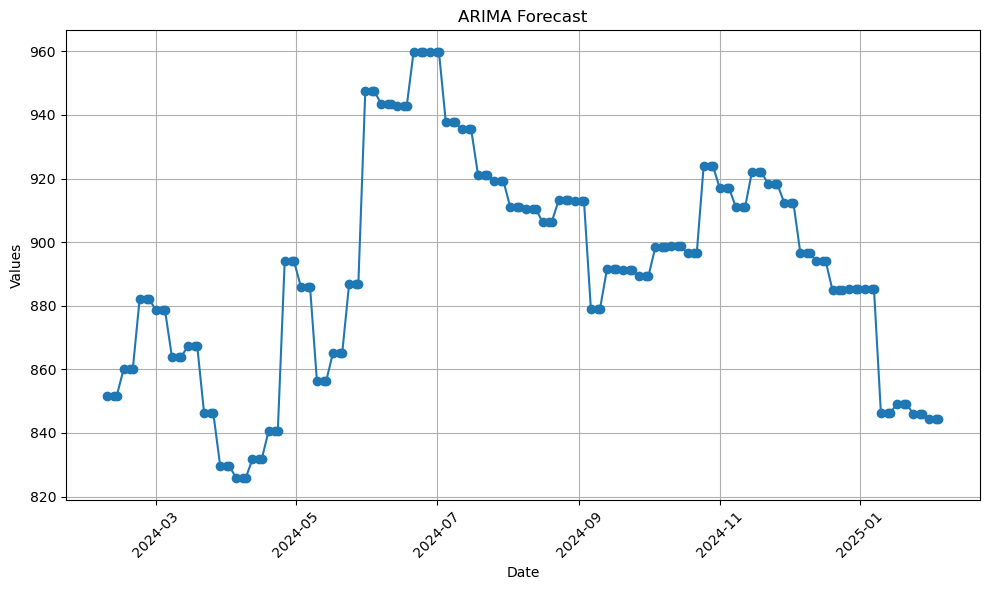

In [15]:
import matplotlib.pyplot as plt

# Plot forecasted data
plt.figure(figsize=(10, 6))
plt.plot(forecast_df["Date"], forecast_df["Forecasted_Values"], marker='o', linestyle='-')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Values")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
overall_forecast = pd.date_range(start=start_date, periods=arima_model.forecast(steps=230).shape[0], freq='B')
overall_forecast

DatetimeIndex(['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15',
               '2024-02-16', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27'],
              dtype='datetime64[ns]', length=230, freq='B')

In [31]:
# Create dataframes for each day of the week
overall_forecast_df = pd.DataFrame({"Date": overall_forecast, "Forecasted_Values": arima_model.forecast(steps=230)})
overall_forecast_df.head(60)

,Date,Forecasted_Values
478,2024-02-12,851.577756
479,2024-02-13,860.022064
480,2024-02-14,882.261875
481,2024-02-15,878.652393
482,2024-02-16,863.922369
483,2024-02-19,867.307825
484,2024-02-20,846.125908
485,2024-02-21,829.532306
486,2024-02-22,825.711696
487,2024-02-23,831.744314


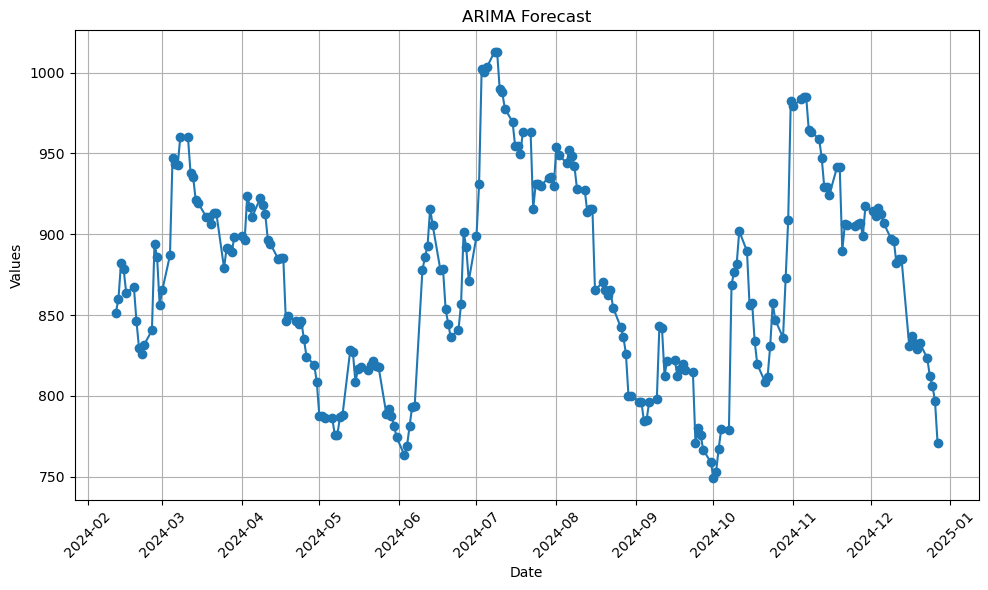

In [25]:
import matplotlib.pyplot as plt

# Plot forecasted data
plt.figure(figsize=(10, 6))
plt.plot(overall_forecast_df["Date"], overall_forecast_df["Forecasted_Values"], marker='o', linestyle='-')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Values")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
